> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Gun Data Analysis 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
Decription of dataset

This dataset recorded month-by-month records of NICS firearms checks across all states from November 1998 to January 1, 2021.
Each column represents the type of transaction submitted to the National Instant Criminal Background Check System (NICS). In addition, each type of transaction is broken down by the type of firearm—handgun, long gun, and other.

The following columns are transactions issued by officially-licensed Federal Firearms Licensee (FFL) or criminal justice/law enforcement agency prior to the issuance of a firearm-related permit or transfer.
permit
permit_recheck
handgun
long_gun
other
mutiple
admin

The following columns are from other transactions
-Pre-Pawn: background checks requested by an officially-licensed FFL on prospective firearm transferees seeking to pledge or pawn a firearm as security for the payment or repayment of money, prior to actually pledging or pawning the firearm.

-Redemption: background checks requested by an officially-licensed FFL on prospective firearm transferees attempting to regain possession of a firearm after pledging or pawning a firearm as security at a pawn shop.

-Returned/Disposition: background checks requested by criminal justice/law enforcement agencies prior to returning a firearm in its possession to the respective transferee, to ensure the individual is not prohibited.

-Rentals: background checks requested by an officially-licensed FFL on prospective firearm transferees attempting to possess a firearm when the firearm is loaned or rented for use off the premises of the business.

-Private Sale: background checks requested by an officially-licensed FFL on prospective firearm transferees attempting to possess a firearm from a private party seller who is not an officially-licensed FFL.

-Return to Seller-Private Sale: background checks requested by an officially-licensed FFL on prospective firearm transferees attempting to possess a firearm from a private party seller who is not an officially-licensed FFL.

From this dataset, we can investigate followings:

*How gun background check has changed across different states?
*Which types of gun are mainly registerred?
*Which month had the highest gun registrations?
*What is the trend of gun registrations across given year periods?

In this project we will be analyzing data associated with gun background checks. In particular, we will be interested in analyzing 

*how gun registraction has changed over the years, and
*Which states have had the highes growth of gun registration?
*Which gun type got the higest background checks?

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv("Gun_data.csv")
# few head columns
df.head(5)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,1/1/2021,Alabama,39955.0,464.0,33563.0,23477.0,2309.0,1568,0.0,26.0,...,0.0,0.0,0.0,25.0,34.0,14.0,0.0,2.0,0.0,105602
1,1/1/2021,Alaska,283.0,4.0,3989.0,3574.0,563.0,262,0.0,1.0,...,0.0,0.0,0.0,7.0,18.0,2.0,0.0,0.0,0.0,9018
2,1/1/2021,Arizona,9237.0,1085.0,29336.0,14430.0,2339.0,1795,0.0,12.0,...,0.0,0.0,0.0,22.0,17.0,3.0,2.0,0.0,2.0,60548
3,1/1/2021,Arkansas,3231.0,1028.0,11993.0,10043.0,715.0,596,15.0,15.0,...,0.0,0.0,0.0,21.0,13.0,2.0,1.0,0.0,0.0,30085
4,1/1/2021,California,19078.0,6462.0,55103.0,36179.0,6807.0,0,0.0,2.0,...,86.0,0.0,0.0,5744.0,2282.0,528.0,55.0,33.0,1.0,134432


In [3]:
df.shape

(14685, 27)

In [4]:
# columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14685 entries, 0 to 14684
Data columns (total 27 columns):
month                        14685 non-null object
state                        14685 non-null object
permit                       14661 non-null float64
permit_recheck               3300 non-null float64
handgun                      14665 non-null float64
long_gun                     14666 non-null float64
other                        7700 non-null float64
multiple                     14685 non-null int64
admin                        14662 non-null float64
prepawn_handgun              12742 non-null float64
prepawn_long_gun             12740 non-null float64
prepawn_other                7315 non-null float64
redemption_handgun           12745 non-null float64
redemption_long_gun          12744 non-null float64
redemption_other             7315 non-null float64
returned_handgun             4400 non-null float64
returned_long_gun            4345 non-null float64
returned_other   

In [5]:
# describetive statistics 
df.describe()


,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,14661.000000,3300.000000,14665.000000,14666.000000,7700.000000,14685.000000,14662.000000,12742.000000,12740.000000,7315.000000,...,4015.000000,3190.000000,3025.000000,4950.000000,4950.000000,4950.000000,4675.000000,4950.000000,4455.000000,1.468500e+04
mean,7213.370029,7922.146364,6985.187794,7956.539479,530.454935,297.300306,53.275065,5.166536,7.573783,0.368148,...,2.797011,0.149216,0.160331,27.087273,20.799394,3.161818,0.908449,0.889091,0.123008,2.546674e+04
std,26122.902080,51397.138867,10417.757938,9230.918721,1371.413576,780.371618,565.368131,11.410729,15.919615,1.372091,...,22.134771,1.010601,1.004165,122.772337,79.037650,15.299881,4.565147,3.826984,0.445148,4.461691e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000,1028.000000,2165.000000,28.000000,14.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.011000e+03
50%,785.000000,0.000000,3478.000000,5251.000000,175.000000,134.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.328400e+04
75%,5467.000000,59.250000,8479.000000,10716.750000,538.000000,329.000000,0.000000,5.000000,8.000000,0.000000,...,1.000000,0.000000,0.000000,13.000000,13.000000,1.000000,0.000000,0.000000,0.000000,2.877900e+04
max,522188.000000,912211.000000,147714.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,592.000000,13.000000,12.000000,5744.000000,2282.000000,528.000000,70.000000,62.000000,5.000000,1.002118e+06


Checking for duplicates

In [6]:
sum(df.duplicated())

0

Checking for outliers by ploting histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f66ae9d1a58>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f66ac4b9ac8>]], dtype=object)

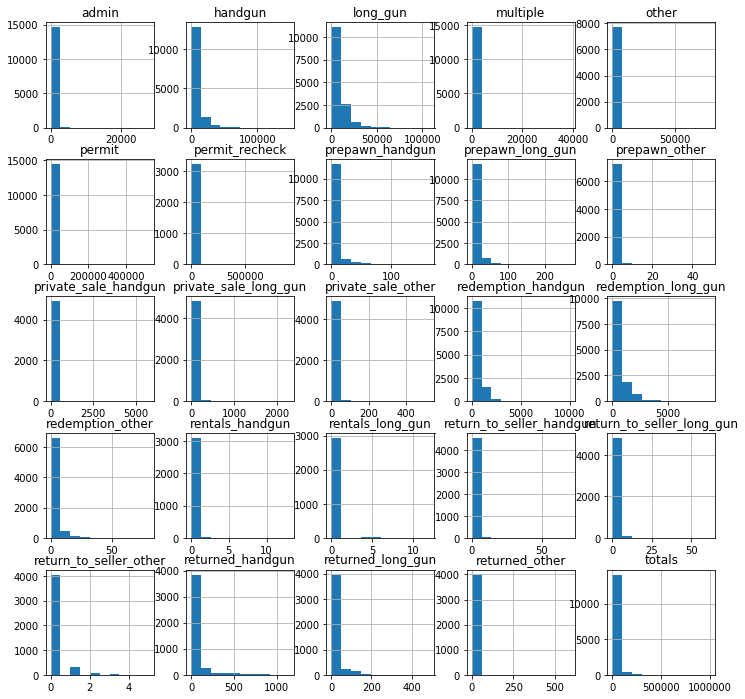

In [7]:
df.hist(figsize=(12,12))

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


checking for missing values

In [8]:
# missing values
df.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

The sum of all background are already given as a column "totals", so let's replace missing values with zero.

In [9]:
# replacing missing values with zero
df.fillna(0,inplace=True)

In [14]:
# check for missing values
df.isnull().sum()

month                        0
state                        0
permit                       0
permit_recheck               0
handgun                      0
long_gun                     0
other                        0
multiple                     0
admin                        0
prepawn_handgun              0
prepawn_long_gun             0
prepawn_other                0
redemption_handgun           0
redemption_long_gun          0
redemption_other             0
returned_handgun             0
returned_long_gun            0
returned_other               0
rentals_handgun              0
rentals_long_gun             0
private_sale_handgun         0
private_sale_long_gun        0
private_sale_other           0
return_to_seller_handgun     0
return_to_seller_long_gun    0
return_to_seller_other       0
totals                       0
dtype: int64

Drop unwanted columns

In [10]:
df.drop(["multiple","admin"],axis=1,inplace=True)

# Exploratory Analysis

### 1. How gun registrations has changed over the given years?

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


single variabel exploration
exploration of permit


Text(0.5,1,'Distribution of Gun Permit')

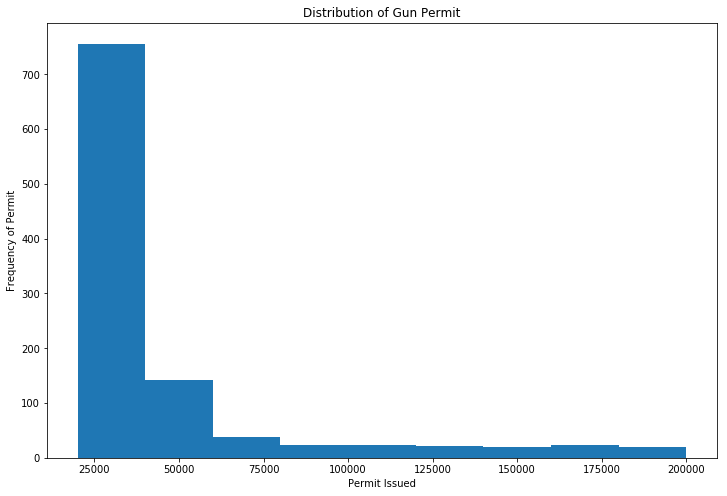

In [35]:
# checking permit of gun registration
bins_list = [20000, 40000, 60000, 80000,100000,120000,140000,160000,180000,200000]
df["permit"].plot.hist(bins=bins_list,figsize=(12,8))
plt.xlabel("Permit Issued")
plt.ylabel("Frequency of Permit")
plt.title("Distribution of Gun Permit")

It shows that most of permit issued are below 40000. let's further check with describetive statistics.

In [38]:
df["permit"].describe()

count     14685.000000
mean       7201.581069
std       26103.171680
min           0.000000
25%           0.000000
50%         782.000000
75%        5452.000000
max      522188.000000
Name: permit, dtype: float64

Text(0.5,1,'Distribution of Permit_Recheck')

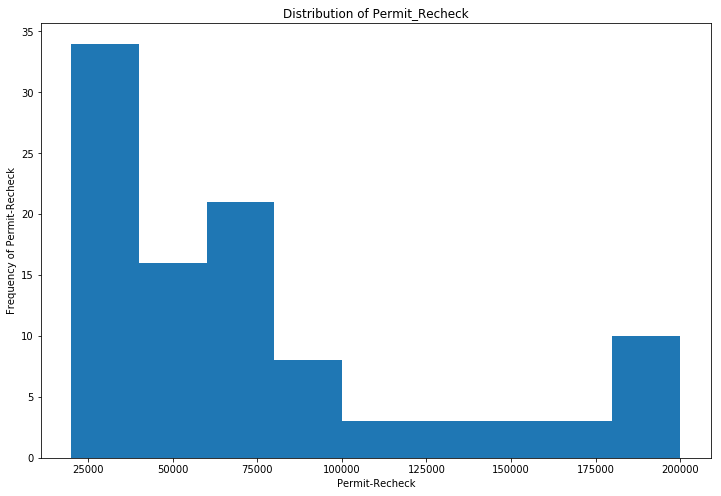

In [37]:
# checking permit_recheck of gun registration
bins_list = [20000, 40000, 60000, 80000,100000,120000,140000,160000,180000,200000]
df["permit_recheck"].plot.hist(bins=bins_list,figsize=(12,8))
plt.xlabel("Permit-Recheck")
plt.ylabel("Frequency of Permit-Recheck")
plt.title("Distribution of Permit_Recheck")

Recheck on gun permit is widely distributed. Most of Recheck happened in below of 75000. Its describetive statistics is given below

In [39]:
df["permit_recheck"].describe()

count     14685.000000
mean       1780.257610
std       24585.121474
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      912211.000000
Name: permit_recheck, dtype: float64

Text(0.5,1,'Plotting Permit Status')

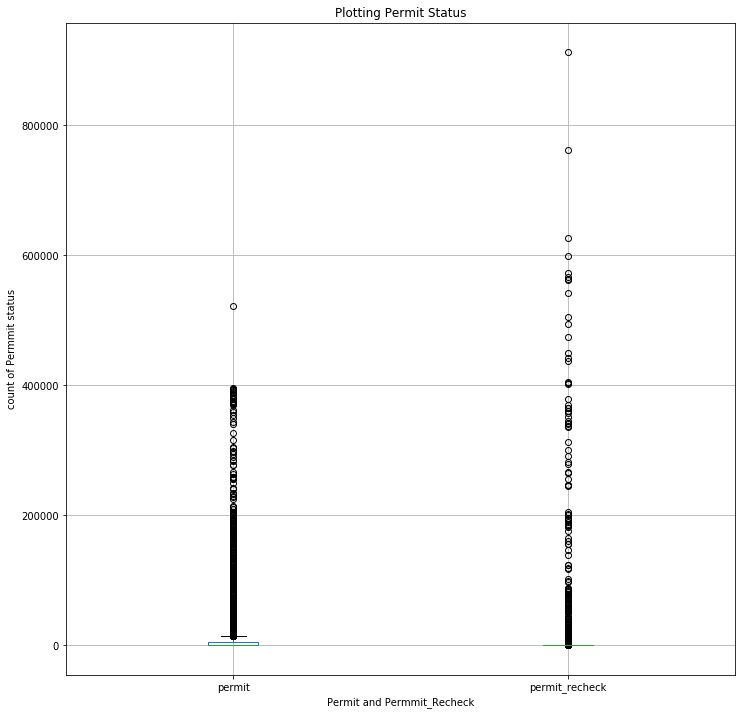

In [46]:
df.boxplot(column=['permit', 'permit_recheck'],figsize=(12,12))
plt.xlabel("Permit and Permmit_Recheck")
plt.ylabel("count of Permmit status")
plt.title("Plotting Permit Status")

Exploration of private sale handgun


Text(0.5,1,'Distribution of Private sale handgun')

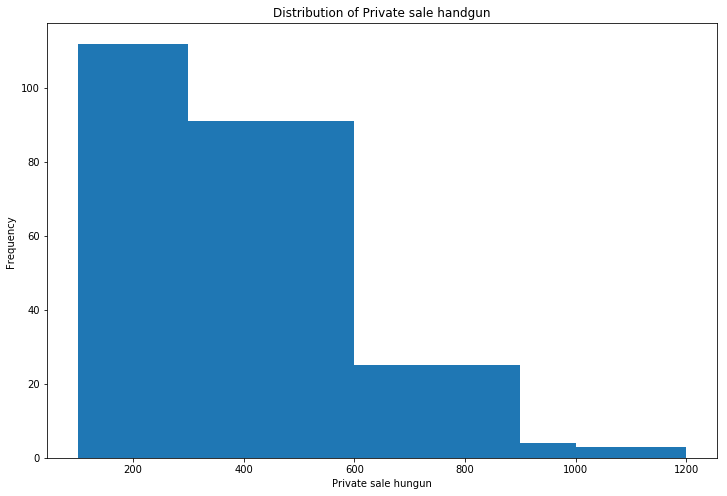

In [45]:
# checking private sale handgun of gun registration
bin_list=[100,300,600,900,1000,1200]
df["private_sale_handgun"].plot.hist(bins=bin_list,figsize=(12,8))
plt.xlabel("Private sale hungun")
plt.ylabel("Frequency ")
plt.title("Distribution of Private sale handgun")

The distribution of private sale handgun is mostly below 600. 

 convert month column to date column by using datetime method

In [51]:
# new column date formed from column month
df["date"]=pd.to_datetime(df["month"])

In [52]:
df.head(2)

,month,state,permit,permit_recheck,handgun,long_gun,other,prepawn_handgun,prepawn_long_gun,prepawn_other,...,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,date
0,1/1/2021,Alabama,39955.0,464.0,33563.0,23477.0,2309.0,26.0,11.0,2.0,...,0.0,0.0,25.0,34.0,14.0,0.0,2.0,0.0,105602,2021-01-01
1,1/1/2021,Alaska,283.0,4.0,3989.0,3574.0,563.0,1.0,1.0,1.0,...,0.0,0.0,7.0,18.0,2.0,0.0,0.0,0.0,9018,2021-01-01


In [53]:
# dropping month column, no need of month column
df.drop(["month"],axis=1,inplace=True)

In [54]:
df.head(2)

,state,permit,permit_recheck,handgun,long_gun,other,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,...,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,date
0,Alabama,39955.0,464.0,33563.0,23477.0,2309.0,26.0,11.0,2.0,2820.0,...,0.0,0.0,25.0,34.0,14.0,0.0,2.0,0.0,105602,2021-01-01
1,Alaska,283.0,4.0,3989.0,3574.0,563.0,1.0,1.0,1.0,149.0,...,0.0,0.0,7.0,18.0,2.0,0.0,0.0,0.0,9018,2021-01-01


Insert new column "month" in index = 0. This column includes month name.

In [55]:
# inserting month column
df.insert(0, "month",df['date'].dt.month_name().str[:3])

In [56]:
# checking for column month
df.head(2)

,month,state,permit,permit_recheck,handgun,long_gun,other,prepawn_handgun,prepawn_long_gun,prepawn_other,...,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,date
0,Jan,Alabama,39955.0,464.0,33563.0,23477.0,2309.0,26.0,11.0,2.0,...,0.0,0.0,25.0,34.0,14.0,0.0,2.0,0.0,105602,2021-01-01
1,Jan,Alaska,283.0,4.0,3989.0,3574.0,563.0,1.0,1.0,1.0,...,0.0,0.0,7.0,18.0,2.0,0.0,0.0,0.0,9018,2021-01-01


Inserting new column "year" by getting year from date column

In [57]:
# new column "year"
df.insert(1,"year",df.date.dt.year)

In [58]:
# checking for year column
df.head(2)

,month,year,state,permit,permit_recheck,handgun,long_gun,other,prepawn_handgun,prepawn_long_gun,...,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,date
0,Jan,2021,Alabama,39955.0,464.0,33563.0,23477.0,2309.0,26.0,11.0,...,0.0,0.0,25.0,34.0,14.0,0.0,2.0,0.0,105602,2021-01-01
1,Jan,2021,Alaska,283.0,4.0,3989.0,3574.0,563.0,1.0,1.0,...,0.0,0.0,7.0,18.0,2.0,0.0,0.0,0.0,9018,2021-01-01


Dropping year 2021 because it has no enough data

In [59]:
# dropping year 2021
df.drop(df[df["year"]==2021].index,inplace=True)

In [60]:
df.head(2)

,month,year,state,permit,permit_recheck,handgun,long_gun,other,prepawn_handgun,prepawn_long_gun,...,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,date
55,Dec,2020,Alabama,33421.0,505.0,31103.0,28933.0,1855.0,43.0,13.0,...,0.0,0.0,30.0,23.0,5.0,2.0,3.0,0.0,100927,2020-12-01
56,Dec,2020,Alaska,441.0,3.0,3658.0,3822.0,430.0,0.0,0.0,...,0.0,0.0,9.0,10.0,1.0,0.0,1.0,0.0,8896,2020-12-01


Get totals registration by grouping in "year"

In [61]:

df_year=df.groupby("year")["totals"].sum()
df_year.head(10)

year
1998      891898
1999     9043747
2000     8427096
2001     8820045
2002     8367069
2003     8402244
2004     8579891
2005     8867055
2006     9993057
2007    11162272
Name: totals, dtype: int64

 Visualization of total gun registration 1998-2020

dropping year 1998

In [62]:
df.drop(df[df["year"]==1998].index,inplace=True)
df.tail(10)

,month,year,state,permit,permit_recheck,handgun,long_gun,other,prepawn_handgun,prepawn_long_gun,...,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,date
14565,Jan,1999,Tennessee,0.0,0.0,9581.0,8696.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18473,1999-01-01
14566,Jan,1999,Texas,5792.0,0.0,18123.0,26179.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50992,1999-01-01
14567,Jan,1999,Utah,0.0,0.0,2041.0,2936.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5055,1999-01-01
14568,Jan,1999,Vermont,0.0,0.0,427.0,605.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1043,1999-01-01
14569,Jan,1999,Virgin Islands,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1999-01-01
14570,Jan,1999,Virginia,0.0,0.0,6298.0,7556.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14009,1999-01-01
14571,Jan,1999,Washington,800.0,0.0,1891.0,5780.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8695,1999-01-01
14572,Jan,1999,West Virginia,0.0,0.0,2989.0,5118.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8260,1999-01-01
14573,Jan,1999,Wisconsin,0.0,0.0,2709.0,5063.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7780,1999-01-01
14574,Jan,1999,Wyoming,67.0,0.0,668.0,1401.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2180,1999-01-01


Text(0,0.5,'Total Gun Registrations')

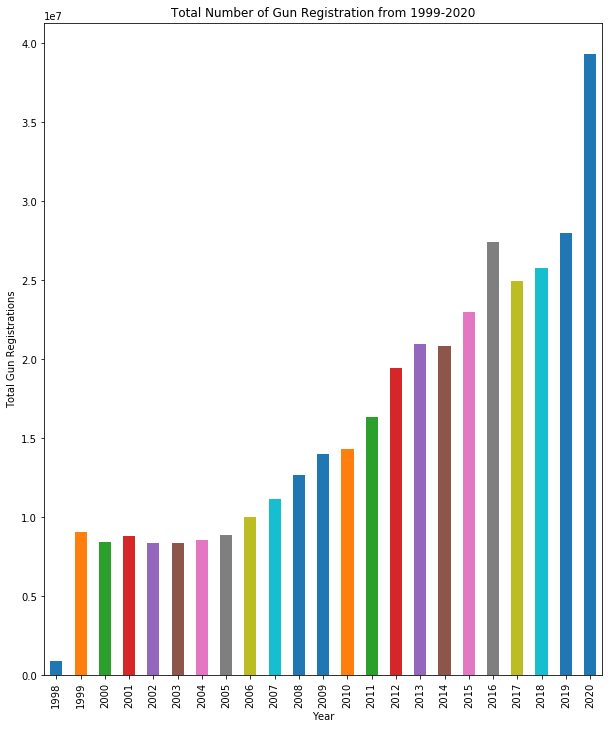

In [63]:
df_year.plot(kind="bar",figsize=(10,12))
plt.title("Total Number of Gun Registration from 1999-2020")
plt.xlabel("Year")
plt.ylabel("Total Gun Registrations")


Redefining df_years as df_year to drop "1998" from the bar graph

In [64]:
df_year=df.groupby("year")["totals"].sum()

In [65]:
#Number of gun registration
print(df_year.sort_values(ascending=False))

year
2020    39326079
2019    28007320
2016    27425512
2018    25769441
2017    24955919
2015    23026288
2013    20966704
2014    20860241
2012    19463832
2011    16336732
2010    14320489
2009    13984953
2008    12692985
2007    11162272
2006     9993057
1999     9043747
2005     8867055
2001     8820045
2004     8579891
2000     8427096
2003     8402244
2002     8367069
Name: totals, dtype: int64


Text(0,0.5,'Gun Registrations (in 10 millions)')

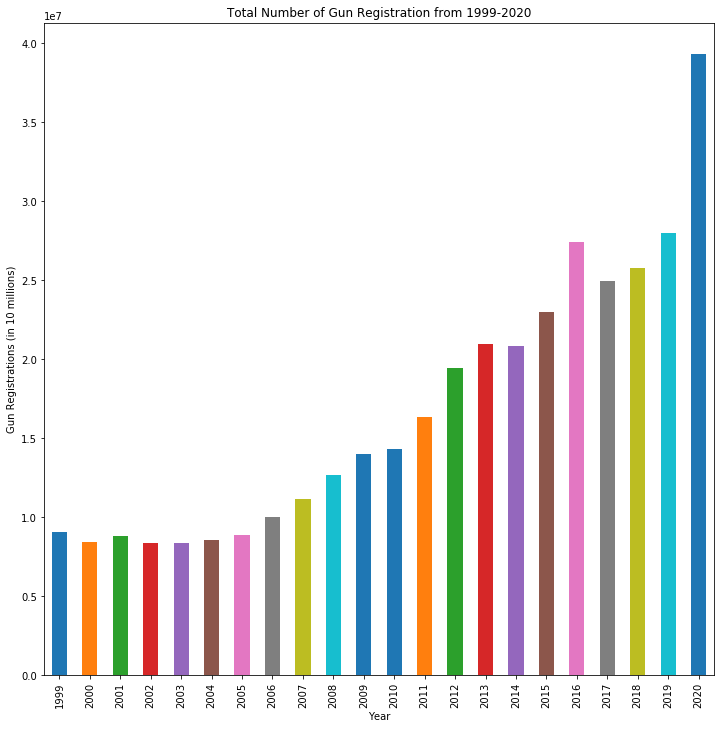

In [66]:
df_year.plot(kind="bar",figsize=(12,12))
plt.title("Total Number of Gun Registration from 1999-2020")
plt.xlabel("Year")
plt.ylabel("Gun Registrations (in 10 millions)")


In [67]:
#Number of gun registration
print(df_year.sort_values(ascending=False))

year
2020    39326079
2019    28007320
2016    27425512
2018    25769441
2017    24955919
2015    23026288
2013    20966704
2014    20860241
2012    19463832
2011    16336732
2010    14320489
2009    13984953
2008    12692985
2007    11162272
2006     9993057
1999     9043747
2005     8867055
2001     8820045
2004     8579891
2000     8427096
2003     8402244
2002     8367069
Name: totals, dtype: int64


Text(0,0.5,'Gun Registrations (in 10 millions)')

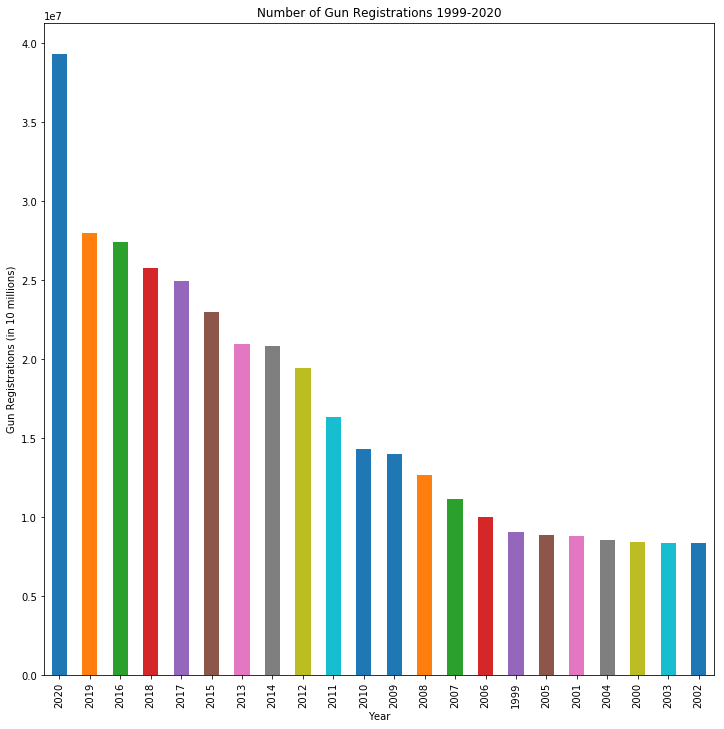

In [36]:
df_year.sort_values(ascending=False).plot(kind="bar",figsize=(12,12))
plt.title("Number of Gun Registrations 1999-2020")
plt.xlabel("Year")
plt.ylabel("Gun Registrations (in 10 millions)")

We found that 2020 has high gun registration. 

Trend of gun registration


Text(0,0.5,'Gun Registrations (in 10 millions)')

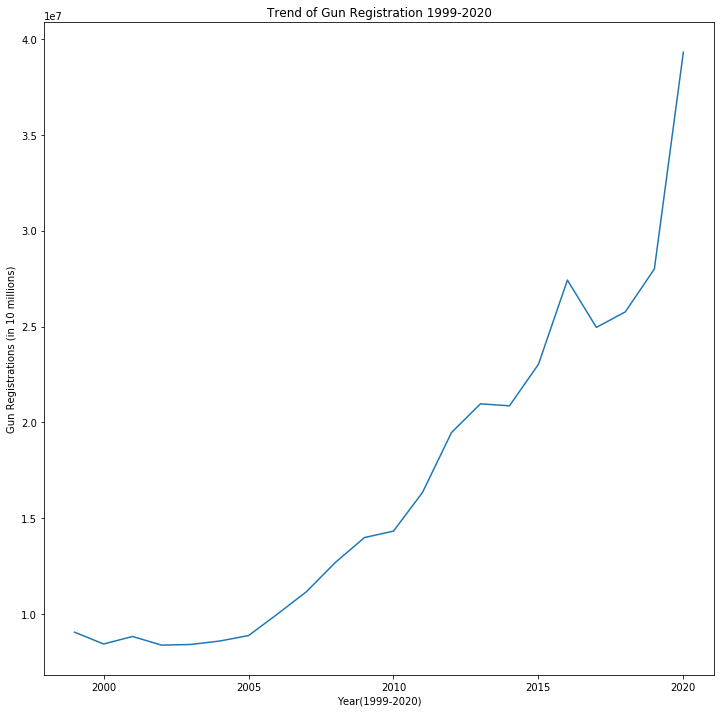

In [68]:
# lineplot
df_year.plot.line(figsize=(12,12))
plt.title("Trend of Gun Registration 1999-2020")
plt.xlabel("Year(1999-2020)")
plt.ylabel("Gun Registrations (in 10 millions)")

Grouping gun registration by month

In [69]:
# group totals by month and sort values in descending
df_month=df.groupby("month")["totals"].sum().sort_values(ascending=False)
print(df_month)

month
Dec    41347200
Nov    35343142
Mar    34426297
Oct    32106910
Feb    31484879
Jan    29393660
Apr    28692004
Sep    28565719
Aug    28319398
Jun    26680971
May    26289204
Jul    26149587
Name: totals, dtype: int64


Text(0,0.5,'Number of Gun Registrations (in 10 millions)')

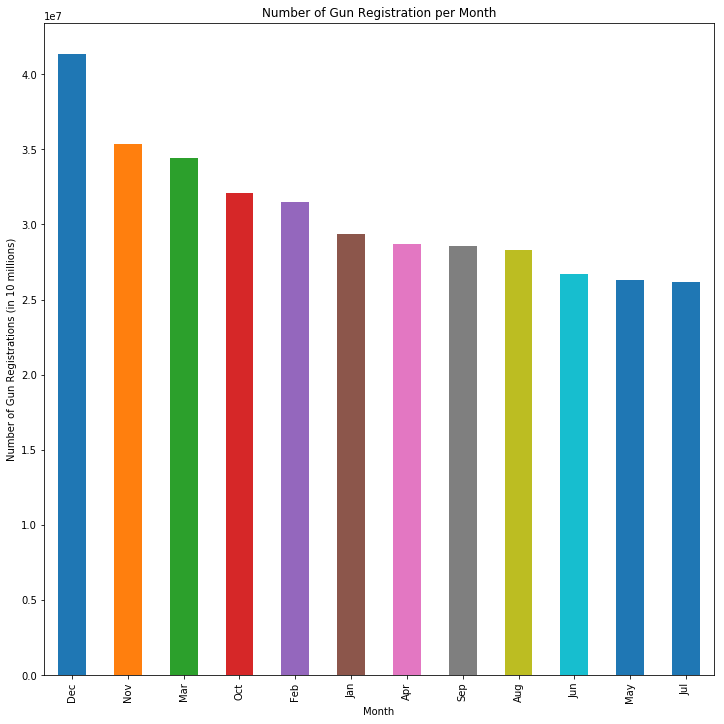

In [70]:
df_month.plot(kind="bar",figsize=(12,12))
plt.title("Number of Gun Registration per Month")
plt.xlabel("Month")
plt.ylabel("Number of Gun Registrations (in 10 millions)")

We found that On December there was highest gun registration.

### 2. Which states have had highest growth in gun registration?


In [71]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


In [72]:
# data from 2020 
df_2020 = df[df["year"] == 2020]

In [73]:
# data_2020 groupby state and get totals
df_2020_state = df_2020.groupby("state")["totals"].sum()

In [74]:
# top 10 states from 2020
df_2020_state.sort_values(ascending=False).head(10)

state
Illinois        7455065
Kentucky        3330462
Texas           2325281
Indiana         1935587
Florida         1912204
California      1601054
Pennsylvania    1452921
Utah            1216773
Alabama         1085475
Michigan        1068511
Name: totals, dtype: int64

In [75]:
# data from 1999
df_1999 = df[df["year"]==1999]

In [76]:
# data_1999 groupby state and get totals
df_1999_state = df_1999.groupby("state")["totals"].sum()

In [79]:
# total growth from 1999 to 2020 in states
df_growth= df_2020_state - df_1999_state

# growth in decending order
df_growth_decending=df_growth.sort_values(ascending=False)

# top 10 highest growth
df_growth_decending.head(10)

state
Illinois        6970217
Kentucky        3082250
Indiana         1732405
Florida         1632504
Texas           1615256
Utah            1139055
Pennsylvania     911366
Alabama          838719
Minnesota        780462
Michigan         760742
Name: totals, dtype: int64

In [80]:
# finding highest growth state
df_growth_decending.idxmax()


'Illinois'

Illinois state had the highest number of gun registration. From 1999 to 2020, in Illinois, gun registration increased by 6970217.

# Types of gun

In [81]:
# df of all handgun from all registration
df_handgun=df.filter(regex="handgun")


In [82]:
# sum of all handgun
df_handgun.sum()

handgun                     101093159.0
prepawn_handgun                 65410.0
redemption_handgun            5626371.0
returned_handgun               235198.0
rentals_handgun                   462.0
private_sale_handgun           124895.0
return_to_seller_handgun         4107.0
dtype: float64

In [83]:
total_handgun=df_handgun.sum().sum()

In [84]:
# df of longgun and sum of all long_gun registration
df_long_gun=df.filter(regex="long_gun")
total_longgun=df_long_gun.sum().sum()

In [85]:
# df of other and sum of all other 
df_other=df.filter(regex="other")
total_other=df_other.sum().sum()

In [87]:
# dataframe of  sum of different types of guns
df_gun=pd.DataFrame({"total_gun_type":[total_handgun,total_longgun,total_other],"gun_type":["total_handgun","total_longgun","total_other"]})
df_gun

,total_gun_type,gun_type
0,107149602.0,total_handgun
1,122923200.0,total_longgun
2,4044955.0,total_other


[Text(0,0.5,'Number of Registration (in 10 millions)'),
 Text(0.5,0,'Gun Types'),
 Text(0.5,1,'Registration by Gun Types (1999-2020)')]

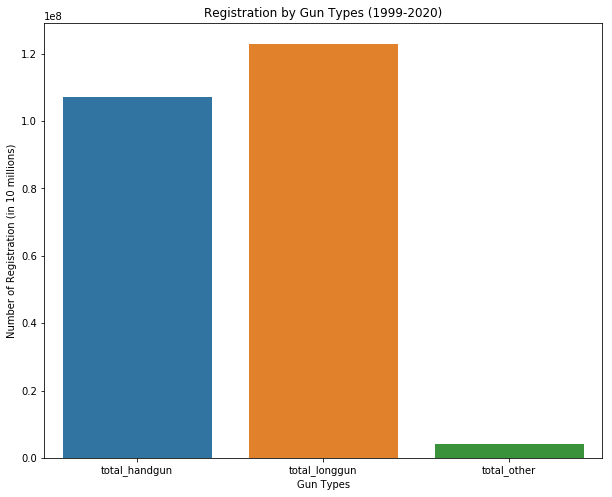

In [88]:
plt.figure(figsize=(10,8))
ax=sns.barplot(x="gun_type",y="total_gun_type",data=df_gun)
ax.set(ylabel='Number of Registration (in 10 millions)', xlabel='Gun Types',title="Registration by Gun Types (1999-2020)")

The highest number of gun registration was for longgun. Then second highest registration was for handgun.

<a id='conclusions'></a>
## Conclusions
Results: Our data suggests that
1. In year between 1990 to 2020, there was highest number of gun background registration in 2020.
When we compared background checks for gun registration for each month, we found that December had most gun background checks.

2. When we compared background checks for types of gun, we found that there was highest number of background checks for longguns, then for shortgun and the least background checks was done for other gun.

3. After comparing gun registration of 1999 and 2020, it was found that Illinois state had the highest growth in gun registration.

limitations:
1. We do not have lots of factors that could contribute to increase in gun registration in year 2020. Similarly, there was no factors provided that could lead to increase gun registraion in month of December.

2. All missing values were replaced by zero because replacing with mean of the specific column could lead to changed in total number of gun registrations in column name "totals".

3. There was limitation on finding factors that lead certain states to have higher gun registrations. Many factors such as population, unemployment, hunting regions, and crime rate could lead to have higher gun registrations.

Discussion:
There was no duplicate rows on this dataset. There data was already been cleaned for duplicates.

Outliers:
The data set has no outliers that could affect my findings. I checked this by using histogram.

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [10]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0